In [24]:
from nltk.corpus import wordnet as wn
import nltk
import pandas as pd
import geopandas as gpd


In [26]:
cities = pd.read_csv("worldcities.csv")
crs = {'init': 'epsg:4326'}
cities = gpd.GeoDataFrame(cities, crs=crs).set_geometry('geometry')
cities

/home/mxc/.virtualenvs/litmaps/lib/python3.10/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_19742/980246607.py:3: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  cities = gpd.GeoDataFrame(cities, crs=crs).set_geometry('geometry')


ValueError: Unknown column geometry

<AxesSubplot:>

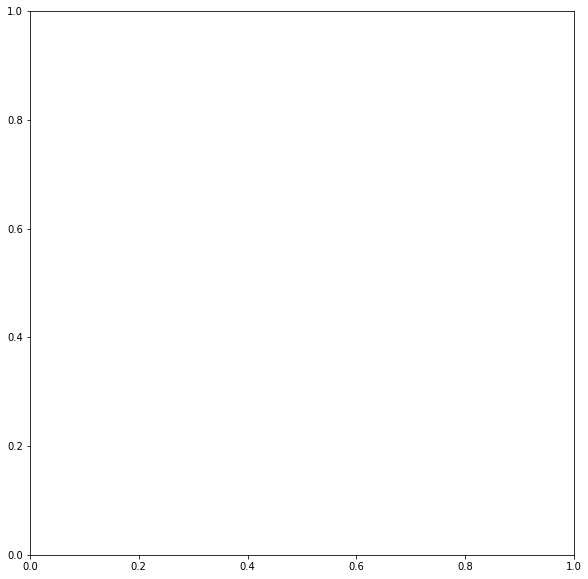

In [21]:
cities[cities["id"] == "1826645935"].plot(figsize=(10, 10))

In [7]:
def load_flanders():
    f = open("moll-flanders.txt")
    text = f.read()
    sentences = nltk.sent_tokenize(text)
    df = pd.DataFrame()
    df["sentence"] = sentences
    df["num"] = range(len(sentences))
    df["pct"] = df.num / len(sentences)

    df["words"] = df.sentence.apply(lambda x: set([w.lower() for w in nltk.word_tokenize(x)]))

    df["has_moll"] = df.sentence.apply(lambda x: "Moll " in x)
    df["location"] = "unknown"
    return df, text


In [13]:
df, txt = load_flanders()
df.head()

,sentence,num,pct,words,has_moll,location
0,My true name is so well known in the records o...,0,0.000000,"{relating, family, consequence, true, without,...",False,unknown
1,"It is enough to tell you, that as some of my w...",1,0.000372,"{(, myself, have, having, it, that, of, way, h...",True,unknown
2,I have been told that in one of neighbour nati...,2,0.000745,"{for, they, their, taught, it, that, know, of,...",False,unknown
3,"Had this been the custom in our country, I had...",3,0.001117,"{girl, amend, without, even, custom, not, dest...",False,unknown
4,But the case was otherwise here.,4,0.001489,"{otherwise, but, case, ., here, was, the}",False,unknown


In [4]:


def tag_location(start_token, end_token, tag):
    """
        start_token: the first part of a sentence where they are in a new location
        end_token: the last part of the sentence in the location
        tag: the short name of the location (e.g. "newcastle", "virginia")
    """
    start = int(df[df.sentence.str.startswith(start_token) == True].num)
    end = int(df[df.sentence.str.startswith(end_token) == True].num)
    def add_tag(row):
        if int(row.num) >= start and int(row.num) <=end:
            return tag
        return row.location
    df.location = df.apply(add_tag, axis=1)


# example: tag these sentences as virginia
tag_location('All that I can say is, that after a terrible passage', 
             'I got to London in about three weeks',
             'Virginia')
df[df.location == 'Virginia']

,sentence,num,pct,words,has_moll,location
580,"All that I can say is, that after a terrible p...",580,0.215934,"{provisions, they, that, of, along, frighted, ...",False,Virginia
581,"We lived here all together, my mother-in-law, ...",581,0.216307,"{with, for, myself, condition, put, not, creat...",False,Virginia
582,"My mother was a mighty cheerful, good-humoured...",582,0.216679,"{with, pleasant, for, woman—i, entertain, call...",False,Virginia
583,"Among the rest, she often told me how the grea...",583,0.217051,"{either, among, they, from, that, speaking, of...",False,Virginia
584,"“Such as we call them, my dear,” says she, “bu...",584,0.217424,"{with, them, prisons, they, from, call, having...",False,Virginia
...,...,...,...,...,...,...
723,I came away for England in the month of August...,723,0.269173,"{august, for, have, attended, new, had, that, ...",False,Virginia
724,We had an indifferent good voyage till we came...,724,0.269546,"{with, three, voyage, put, upon, had, just, of...",False,Virginia
725,"We remained there about\nthirteen days, got so...",725,0.269918,"{with, for, put, they, not, sea, again, it, me...",False,Virginia
726,"But we got\nat last into Milford Haven, in Wal...",726,0.270290,"{papers, waters, for, money, it, of, whither, ...",False,Virginia


In [14]:
[
    {
        "location":"newgate",
        "lat": 51.5159987, 
        "long": -0.1014928
    }
]
loc = geopandas


,sentence,num,pct,words,has_moll,location
580,"All that I can say is, that after a terrible p...",580,0.215934,"{provisions, they, that, of, along, frighted, ...",False,unknown
581,"We lived here all together, my mother-in-law, ...",581,0.216307,"{with, for, myself, condition, put, not, creat...",False,unknown
582,"My mother was a mighty cheerful, good-humoured...",582,0.216679,"{with, pleasant, for, woman—i, entertain, call...",False,unknown
583,"Among the rest, she often told me how the grea...",583,0.217051,"{either, among, they, from, that, speaking, of...",False,unknown
584,"“Such as we call them, my dear,” says she, “bu...",584,0.217424,"{with, them, prisons, they, from, call, having...",False,unknown
585,"“When they come here,” says she, “we make no d...",585,0.217796,"{them, they, their, planters, together, here, ...",False,unknown
586,"When ’tis expired,” said she, “they have encou...",586,0.218168,"{encouragement, with, them, for, tobacco, they...",False,unknown
587,"“Hence, child,” says she, “man a Newgate-bird ...",587,0.218541,"{towns, with, ventured, hand., man, they, have...",False,unknown
588,"“And here’s the mark of it, child,” says\nshe;...",588,0.218913,"{mark, s, showed, branded, it, white, here, ye...",False,unknown
589,"This story was very moving to me, but my mothe...",589,0.219285,"{for, men, they, not, it, of, hand, as, story,...",False,unknown


In [42]:

start = 'All that I can say is, that after a terrible passage'
df[df.sentence.str.startswith(start) == True].num

580    580
Name: num, dtype: int64

In [38]:
va_start = df.query("sentence.str.startswith('All that I can say is, that after a terrible passage')").num
va_start

580    580
Name: num, dtype: int64

In [23]:
df[df.has_moll == True]

,sentence,num,pct,has_moll
0,The Fortunes and Misfortunes of the Famous Mol...,0,0.000000,True
35,"We cannot say, indeed, that this history is ca...",35,0.012844,True
39,"It is enough to tell you, that as some of my w...",39,0.014312,True
1728,These were they that gave me the name of Moll ...,1728,0.634128,True
1795,They all knew me by the name of\nMoll Flanders...,1795,0.658716,True
1806,I was now easy as to all fear of witnesses aga...,1806,0.662752,True
2211,"Mrs. Mary, Mrs. Molly, and after that plain Mo...",2211,0.811376,True
2385,Immediately it was rumoured all over the priso...,2385,0.875229,True
